In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# **Data Processing**

# Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5216 files belonging to 2 classes.


# Validation Image Preprocessing

In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16 files belonging to 2 classes.


# **Building Model**

# Building Convolution Layer

In [19]:
cnn = Sequential([
    Input(shape=[128, 128, 1]),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.45),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compiling and Training Phase

In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [21]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,757,409 (10.52 MB)

 Trainable params: 2,757,409 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = cnn.fit(training_set, epochs=10, validation_data=validation_set)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.7554 - loss: 0.8697 - precision_1: 0.8210 - recall_1: 0.8559 - val_accuracy: 0.9375 - val_loss: 0.2019 - val_precision_1: 0.8889 - val_recall_1: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.9300 - loss: 0.1815 - precision_1: 0.9531 - recall_1: 0.9519 - val_accuracy: 0.7500 - val_loss: 0.3569 - val_precision_1: 0.6667 - val_recall_1: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9533 - loss: 0.1176 - precision_1: 0.9665 - recall_1: 0.9701 - val_accuracy: 0.9375 - val_loss: 0.1929 - val_precision_1: 0.8889 - val_recall_1: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9641 - loss: 0.0928 - precision_1: 0.9736 - recall_1: 0.9781 - val_accuracy: 0.8750 - val_loss: 0.1892 - val_precision_1: 0.8000 - val_recall_1: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9701 - loss: 0.0730 - precision_1: 0.9821 - recall_1: 0.9

# **Evaluating Model**

In [24]:
# Evaluate the model on the training set
train_loss, train_acc, train_precision, train_recall = cnn.evaluate(training_set)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)
print('Training precision:', train_precision)
print('Training recall:', train_recall)

163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 375ms/step - accuracy: 0.9908 - loss: 0.0252 - precision_1: 1.0000 - recall_1: 0.9876
Training loss: 0.022622909396886826
Training accuracy: 0.9917561411857605
Training precision: 1.0
Training recall: 0.9889032244682312


In [23]:
# Explicit unpacking assuming the model was compiled with loss, accuracy, precision, and recall
val_loss, val_acc, val_precision, val_recall = cnn.evaluate(validation_set, verbose=1)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)
print('Validation Precision:', val_precision)
print('Validation Recall:', val_recall)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 1.0000 - loss: 0.0128 - precision_1: 1.0000 - recall_1: 1.0000
Validation Loss: 0.012839442119002342
Validation Accuracy: 1.0
Validation Precision: 1.0
Validation Recall: 1.0


# **Saving Model**

In [26]:
cnn.save('pneumonia_x-ray_model.keras')

In [27]:
# Dcitionary of Training History
training_history.history

{'accuracy': [0.8456671833992004,
  0.9386503100395203,
  0.9562883377075195,
  0.9679831266403198,
  0.9735429286956787,
  0.9745015501976013,
  0.9796779155731201,
  0.9829370975494385,
  0.9838957190513611,
  0.9871549010276794],
 'loss': [0.4383174180984497,
  0.15971486270427704,
  0.11719723790884018,
  0.08441146463155746,
  0.06782466173171997,
  0.06587845087051392,
  0.053168535232543945,
  0.04723217338323593,
  0.038684405386447906,
  0.03598291054368019],
 'precision_1': [0.8805156350135803,
  0.9577646255493164,
  0.9700953960418701,
  0.9775888919830322,
  0.9831911325454712,
  0.9834625124931335,
  0.9875808358192444,
  0.9896534085273743,
  0.9891613125801086,
  0.9930087924003601],
 'recall_1': [0.9166451692581177,
  0.9597419500350952,
  0.9710967540740967,
  0.9793548583984375,
  0.9811612963676453,
  0.9821935296058655,
  0.9850322604179382,
  0.9873548150062561,
  0.9891613125801086,
  0.9896774291992188],
 'val_accuracy': [0.9375,
  0.75,
  0.9375,
  0.875,
  1.0

In [28]:
import json
with open('training_hist.json','w') as training_file:
  json.dump(training_history.history,training_file)

In [29]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


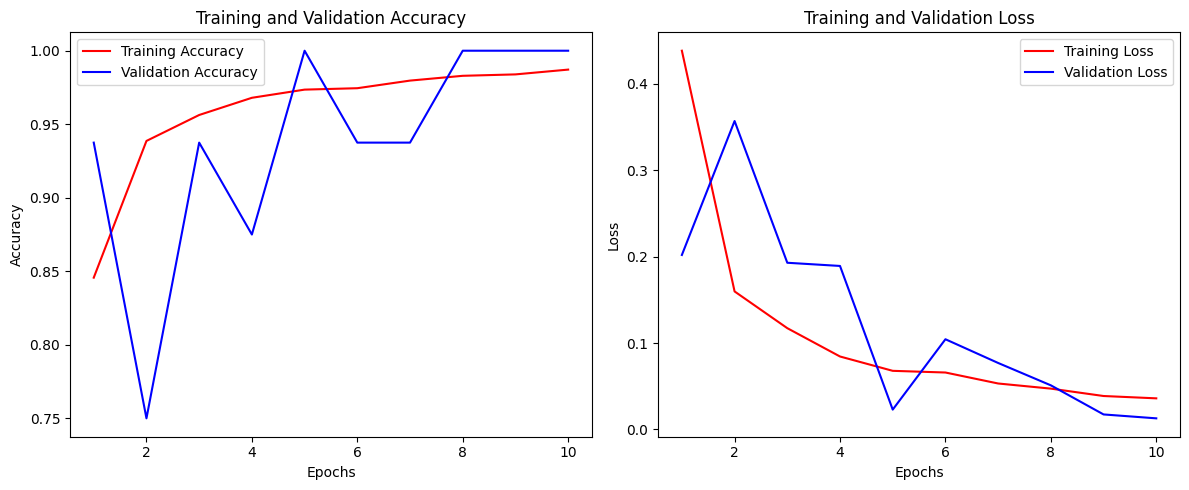

In [30]:
# Assuming `training_history` is the output of your model's fit method
epochs = [i for i in range(1, 11)]

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()